## **Identifying Fraudulent Transactions:**  

### Objective the Project:
- The Objective of this project is to build a Predictive model to determine whether a given transaction will be fraudulent or not.
- Handle time-based anomalies (e.g., multi-swipes or reversals within short intervals).


**Business goal:**
- Maximize fraud detection (recall) without too many false positives (precision trade-off).
- Identifying fraudulent transaction is crucial for Financial and Banking domains to reduce financial loss and to improve customer satisfaction.

### **Importing Neccessary libraries**

- I am importing the jsonlines library because the data is in text format, specifically structured as JSONLines (where each line is a valid JSON object).

- The jsonlines library allows me to efficiently read and process this type of data line by line, which is particularly useful for large datasets.

In [1]:
!pip install jsonlines


In [2]:
!pip install xgboost


This script loads line-delimited JSON data from a .txt file (each line is a JSON object), handles invalid lines gracefully, and converts the cleaned data into a structured pandas DataFrame for analysis. (Useful when Processing large datasets like logs, transactions)

In [3]:
import jsonlines
import pandas as pd
from datetime import datetime
import sys
print(sys.executable)

data = []

with jsonlines.open("/content/transactions data.txt") as reader:
  for obj in reader.iter(skip_invalid=True): # Used Skip_invalid as True to ignore any error related to extra characters after valid JSON Object
    data.append(obj)

data = pd.DataFrame(data)
data

/usr/bin/python3


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132532,204752783,204752783,15000.0,11272.02,2016-05-28T15:44:48,89.57,ebay.com,US,US,02,...,,3727.98,,,,False,,,False,False
132533,204752783,204752783,15000.0,11207.45,2016-06-12T22:45:14,134.47,amazon.com,US,US,80,...,,3792.55,,,,False,,,False,False
132534,204752783,204752783,15000.0,11072.98,2016-06-14T06:14:35,9.37,amazon.com,US,US,02,...,,3927.02,,,,False,,,False,False
132535,204752783,204752783,15000.0,11063.61,2016-06-15T08:08:11,437.77,amazon.com,US,US,09,...,,3936.39,,,,False,,,False,False


## **Exploring the data set:**

### **1.Exploratory Data Analysis Phase:**  

In [4]:
print(data.info())  # Print a summary of the DataFrame (columns, types, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132537 entries, 0 to 132536
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             132537 non-null  object 
 1   customerId                132537 non-null  object 
 2   creditLimit               132537 non-null  float64
 3   availableMoney            132537 non-null  float64
 4   transactionDateTime       132537 non-null  object 
 5   transactionAmount         132537 non-null  float64
 6   merchantName              132537 non-null  object 
 7   acqCountry                132537 non-null  object 
 8   merchantCountryCode       132537 non-null  object 
 9   posEntryMode              132537 non-null  object 
 10  posConditionCode          132537 non-null  object 
 11  merchantCategoryCode      132537 non-null  object 
 12  currentExpDate            132537 non-null  object 
 13  accountOpenDate           132537 non-null  o

Transaction dataset has total of **289230** entries, with total of **29** coulmns.

It has object, float, datetime and boolean data types which indicates dataset has mix of different set values.    

#### Missing Values

The dataset was checked for missing values using the isnull().sum() method, which returns the count of null entries for each column. The output confirms that:

There are no missing values in any column.
Each column has complete data across all 786,363 records.

In [5]:
# Check remaining missing values
missing_summary = data.isnull().sum()
print(missing_summary)

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64


In [6]:
# Count unique values in each column
unique_counts = data.nunique()

# Display the result
print("Unique value count per column:")
print(unique_counts)

Unique value count per column:
accountNumber                  902
customerId                     902
creditLimit                     10
availableMoney              113027
transactionDateTime         132250
transactionAmount            39174
merchantName                  2368
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate                670
dateOfLastAddressChange        918
cardCVV                        689
enteredCVV                     842
cardLast4Digits               1225
transactionType                  4
echoBuffer                       1
currentBalance              111005
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch

In [7]:
# Data Structure and Summary
print("Number of records:", data.shape[0])
print("Number of fields per record:", data.shape[1])

Number of records: 132537
Number of fields per record: 29


In [8]:
# Show unique values for each column (first 10 values only to keep output readable)
for col in data.columns:
    print(f"\nColumn: {col}")
    print(data[col].unique()[:10])  # Shows only first 10 unique values



Column: accountNumber
['737265056' '830329091' '574788567' '924729945' '984504651' '114896048'
 '482277829' '239577603' '863358589' '711536931']

Column: customerId
['737265056' '830329091' '574788567' '924729945' '984504651' '114896048'
 '482277829' '239577603' '863358589' '711536931']

Column: creditLimit
[ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]

Column: availableMoney
[5000.   4990.63 4959.25 4918.5  4877.75 2500.   2469.92 2428.67 2304.46
 2108.39]

Column: transactionDateTime
['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39'
 '2016-12-10T02:14:50' '2016-03-24T21:04:46' '2016-04-19T16:24:27'
 '2016-05-21T14:50:35' '2016-06-03T00:31:21' '2016-06-10T01:21:46'
 '2016-07-11T10:47:16']

Column: transactionAmount
[ 98.55  74.51   7.47  71.18  30.76  57.28   9.37 523.67 164.37 160.18]

Column: merchantName
['Uber' 'AMC #191138' 'Play Store' 'Tim Hortons #947751'
 'In-N-Out #422833' 'Krispy Kreme #685312' 'Shake Shack #968081'
 'Burger King 

Below, I've Compared  the two columns AccountNumber and CustomerId element-wise across all rows.
Returns True if they are exactly the same (including order, values, and data types).

Since the columns are identical, keeping both is redundant.
Removes customerId to avoid duplication, reduce memory usage, and improve dataset clarity.

In [9]:
# Display the first few rows of customerId and accountNumber columns
print("First few rows of customerId and accountNumber:")
print(data[['customerId', 'accountNumber']].head())

# Check if the columns are identical
are_identical = data['customerId'].equals(data['accountNumber'])
print(f"Are 'customerId' and 'accountNumber' identical? {are_identical}")
data[['customerId', 'accountNumber']].tail()

data = data.drop(columns=['customerId'])

First few rows of customerId and accountNumber:
  customerId accountNumber
0  737265056     737265056
1  737265056     737265056
2  737265056     737265056
3  737265056     737265056
4  830329091     830329091
Are 'customerId' and 'accountNumber' identical? True


After verifying that the customerId and accountNumber columns contained identical values, I dropped the customerId column to eliminate redundancy.  

**Several columns were found to contain only empty strings and whitespaces across all rows (e.g., echoBuffer, merchantState, merchantZip). These columns were removed as they offer no analytical value. Columns with partial missing data (e.g., acqCountry, posEntryMode) will be handled separately by imputation or row removal based on their importance in modeling.**

In [10]:
empty_counts = (data == '') | (data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))
empty_counts_sum = empty_counts.sum()
print(empty_counts_sum[empty_counts_sum > 0])  # Only show columns with empty strings

<ipython-input-10-ae992d2fe36a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_counts = (data == '') | (data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))


acqCountry                748
merchantCountryCode       134
posEntryMode              731
posConditionCode           66
transactionType           123
echoBuffer             132537
merchantCity           132537
merchantState          132537
merchantZip            132537
posOnPremises          132537
recurringAuthInd       132537
dtype: int64


In [11]:
cols_to_drop = [
    'echoBuffer', 'merchantCity', 'merchantState',
    'merchantZip', 'posOnPremises', 'posConditionCode',  'recurringAuthInd'
]
data = data.drop(columns=cols_to_drop)

In [12]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Count them
print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}\n")

print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {numerical_cols}")


Number of categorical columns: 14
Categorical columns: ['accountNumber', 'transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType']

Number of numerical columns: 4
Numerical columns: ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']


lets check if we can convert some object coulmns to numeric as object dataype takes more processing time and reduces speed of our analysis. We would like to make our dataflow more scalable.

In [18]:
# Identify all object-type columns
object_cols = data.select_dtypes(include='object').columns

# Check which of these can be converted to numbers
for col in object_cols:
    try:
        data_chiSquare[col].astype(float)
        print(f"{col} can be converted to numeric.")
    except ValueError:
        print(f"{col} cannot be converted.")


transactionDateTime cannot be converted.
merchantName cannot be converted.
acqCountry cannot be converted.
merchantCountryCode cannot be converted.
posEntryMode cannot be converted.
merchantCategoryCode cannot be converted.
currentExpDate cannot be converted.
accountOpenDate cannot be converted.
dateOfLastAddressChange cannot be converted.
transactionType cannot be converted.


In [14]:
# List of columns that can be converted to numeric
convertible_cols = ['accountNumber', 'cardCVV', 'enteredCVV', 'cardLast4Digits']

# Convert these columns to numeric type (will raise error if invalid data found)
for col in convertible_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Non-numeric values become NaN

# Optional: Check if conversion worked
print(data[convertible_cols].dtypes)


accountNumber      int64
cardCVV            int64
enteredCVV         int64
cardLast4Digits    int64
dtype: object


Now its converted and will make our analysis more smooth, lets check now how many categorical and numerical coulmns we have, what are the data types ?

In [15]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Count them
print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}\n")

print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {numerical_cols}")

Number of categorical columns: 10
Categorical columns: ['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']

Number of numerical columns: 8
Numerical columns: ['accountNumber', 'creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']


In [16]:
data_chiSquare = data.copy()

I've made a copy of my data to run a Chi-Square test. The Chi-Square test helps identify which categorical features are statistically significant in relation to the target variable. It tells us whether the association between a feature and the target is likely due to chance or not. A low p-value indicates that the relationship is statistically significant and not random.

In [17]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

categorical_cols = ['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']

# Step 1: Fill NA if any
data_chiSquare[categorical_cols] = data_chiSquare[categorical_cols].fillna('Unknown')

# Step 2: Label Encode all categorical variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_chiSquare[col + '_enc'] = le.fit_transform(data_chiSquare[col])
    le_dict[col] = le  # Save encoders if needed

# Step 3: Chi-square test
X = data_chiSquare[[col + '_enc' for col in categorical_cols]]
y = data_chiSquare['isFraud']

chi_scores, p_values = chi2(X, y)

# Step 4: Display results
chi2_results = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2_Score': chi_scores,
    'P_Value': p_values
}).sort_values(by='P_Value')

print("📊 Chi-Square Test Results:")
print(chi2_results)


📊 Chi-Square Test Results:
                   Feature     Chi2_Score        P_Value
0      transactionDateTime  141740.760766   0.000000e+00
1             merchantName   14552.880454   0.000000e+00
7          accountOpenDate     581.724890  1.580822e-128
8  dateOfLastAddressChange     289.048527   8.014469e-65
5     merchantCategoryCode     165.573608   6.855007e-38
6           currentExpDate      13.950443   1.876934e-04
4             posEntryMode       6.967548   8.300115e-03
2               acqCountry       1.006641   3.157089e-01
3      merchantCountryCode       0.469816   4.930719e-01
9          transactionType       0.289686   5.904215e-01


Columns such as PosEntryMode, CurrentExpDate, TransactionType, AcqCountry, and MerchantCountryCode exhibit low Chi-Square statistics and high p-values, indicating a lack of statistical significance in distinguishing between fraudulent and non-fraudulent transactions. As a result, these features can be safely excluded from further analysis.

In contrast, variables like MerchantName, TransactionDateTime, MerchantCategoryCode, AccountOpenDate and  DateOfLastChangeOfAddress demonstrate high Chi-Square values and low p-values, suggesting a strong relationship with the target variable (fraud). These features are thus retained for potential use in model development.

To further validate the significance of the retained features, an additional analysis was conducted by calculating the average fraud rate for each category within these variables. This approach helps reinforce their predictive power and supports their inclusion in the final modeling pipeline.

In [19]:
cols_to_drop = ['posEntryMode', 'currentExpDate', 'acqCountry', 'merchantCountryCode']

data.drop(columns=cols_to_drop, inplace=True)

In [20]:
# Convert to datetime format (if not already)
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])

# Extract relevant fraud detection features
data['trans_hour'] = data['transactionDateTime'].dt.hour                  # Hour of day
data['trans_weekday'] = data['transactionDateTime'].dt.weekday            # 0 = Monday, 6 = Sunday
data['trans_month'] = data['transactionDateTime'].dt.month                # Month
data['is_weekend'] = data['trans_weekday'].isin([5, 6]).astype(int)       # 1 if Sat/Sun

# Optional: Flag for business hours (e.g., 9AM–6PM)
data['is_business_hour'] = data['trans_hour'].between(9, 18).astype(int)

# First, sort by account and datetime to calculate time differences
data.sort_values(by=['accountNumber', 'transactionDateTime'], inplace=True)

# Flag: High-risk hour (e.g., midnight to 6 AM)
data['is_late_night'] = data['trans_hour'].between(0, 5).astype(int)


In [21]:
data

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,accountOpenDate,dateOfLastAddressChange,cardCVV,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night
87916,100328049,5000.0,5000.00,2016-01-02 21:53:53,0.00,Quizno's #808797,fastfood,2014-01-07,2014-01-07,944,...,0.00,False,False,False,21,5,1,1,0,0
87917,100328049,5000.0,5000.00,2016-01-07 21:02:41,109.13,KFC #113520,fastfood,2014-01-07,2014-01-07,944,...,0.00,True,False,False,21,3,1,0,0,0
87918,100328049,5000.0,4890.87,2016-01-15 02:59:34,242.03,Wendys #283022,fastfood,2014-01-07,2014-01-07,206,...,109.13,True,False,False,2,4,1,0,0,1
87919,100328049,5000.0,4648.84,2016-01-15 20:34:35,43.74,Lyft,rideshare,2014-01-07,2014-01-07,206,...,351.16,False,False,False,20,4,1,0,0,0
87920,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,rideshare,2014-01-07,2014-01-07,206,...,394.90,False,False,False,20,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,5000.0,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,food,2015-10-09,2015-10-09,140,...,78.68,True,False,False,15,4,9,0,1,0
108112,999389635,5000.0,4653.70,2016-09-22 13:58:30,4.62,Play Store,mobileapps,2015-10-09,2015-10-09,140,...,346.30,False,False,False,13,3,9,0,1,0
108113,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,mobileapps,2015-10-09,2015-10-09,140,...,325.92,False,False,False,16,6,10,1,1,0
108114,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,mobileapps,2015-10-09,2015-10-09,140,...,305.54,False,False,False,0,3,11,0,0,1


In [22]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
numerical_cols


['accountNumber',
 'creditLimit',
 'availableMoney',
 'transactionAmount',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'currentBalance',
 'trans_hour',
 'trans_weekday',
 'trans_month',
 'is_weekend',
 'is_business_hour',
 'is_late_night']

In [23]:
# List of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fraud rate per category
for col in categorical_cols:
    print(f"\nMean Fraud Rate by '{col}':")
    print(data.groupby(col)['isFraud'].mean().sort_values(ascending=False))



Mean Fraud Rate by 'merchantName':
merchantName
In-N-Out #949129        0.642857
In-N-Out #567597        0.428571
In-N-Out #811300        0.375000
In-N-Out #863086        0.375000
In-N-Out #422833        0.375000
                          ...   
Krispy Kreme #348894    0.000000
Krispy Kreme #369128    0.000000
Krispy Kreme #420031    0.000000
Krispy Kreme #446934    0.000000
Krispy Kreme #205879    0.000000
Name: isFraud, Length: 2368, dtype: float64

Mean Fraud Rate by 'merchantCategoryCode':
merchantCategoryCode
airline                 0.023768
rideshare               0.022445
online_gifts            0.020611
online_retail           0.019599
fastfood                0.019392
auto                    0.016590
subscriptions           0.015026
personal care           0.014177
food                    0.012331
furniture               0.010823
entertainment           0.005975
hotels                  0.004245
health                  0.004000
cable/phone             0.000000
food_delivery    

IN & OUT and American airlines seems to have high fraud rate.

Airline and rideshare has significant high fraud rate 3.4% followed by online_retail,online_gifts and furniture - 2.4%

While other Merchant categories are not having high fraud rate which is kind of understandable as big amounts leads to more fraudulent activities.

**These results can be pontentially bacause of imbalance dataset and could lead to bias results, we cannot solely rely on these findings without using SMOTE or class weightage techniques**.



In [24]:
# Convert all boolean columns to 1/0
df = data.copy()
df = df.map(lambda x: 1 if x is True else (0 if x is False else x))

In [25]:
df

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,accountOpenDate,dateOfLastAddressChange,cardCVV,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night
87916,100328049,5000.0,5000.00,2016-01-02 21:53:53,0.00,Quizno's #808797,fastfood,2014-01-07,2014-01-07,944,...,0.00,0,0,0,21,5,1,1,0,0
87917,100328049,5000.0,5000.00,2016-01-07 21:02:41,109.13,KFC #113520,fastfood,2014-01-07,2014-01-07,944,...,0.00,1,0,0,21,3,1,0,0,0
87918,100328049,5000.0,4890.87,2016-01-15 02:59:34,242.03,Wendys #283022,fastfood,2014-01-07,2014-01-07,206,...,109.13,1,0,0,2,4,1,0,0,1
87919,100328049,5000.0,4648.84,2016-01-15 20:34:35,43.74,Lyft,rideshare,2014-01-07,2014-01-07,206,...,351.16,0,0,0,20,4,1,0,0,0
87920,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,rideshare,2014-01-07,2014-01-07,206,...,394.90,0,0,0,20,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,5000.0,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,food,2015-10-09,2015-10-09,140,...,78.68,1,0,0,15,4,9,0,1,0
108112,999389635,5000.0,4653.70,2016-09-22 13:58:30,4.62,Play Store,mobileapps,2015-10-09,2015-10-09,140,...,346.30,0,0,0,13,3,9,0,1,0
108113,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,mobileapps,2015-10-09,2015-10-09,140,...,325.92,0,0,0,16,6,10,1,1,0
108114,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,mobileapps,2015-10-09,2015-10-09,140,...,305.54,0,0,0,0,3,11,0,0,1


In [26]:
# Convert to datetime
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors='coerce')
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')

# Create engineered features
df['accountAgeDays'] = (pd.to_datetime('today') - df['accountOpenDate']).dt.days
df['daysSinceAddressChange'] = (pd.to_datetime('today') - df['dateOfLastAddressChange']).dt.days


In [27]:
df = df.drop(columns=['accountOpenDate', 'dateOfLastAddressChange'])


In [28]:
df

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,...,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
87916,100328049,5000.0,5000.00,2016-01-02 21:53:53,0.00,Quizno's #808797,fastfood,944,944,313,...,0,0,21,5,1,1,0,0,4166,4166
87917,100328049,5000.0,5000.00,2016-01-07 21:02:41,109.13,KFC #113520,fastfood,944,944,313,...,0,0,21,3,1,0,0,0,4166,4166
87918,100328049,5000.0,4890.87,2016-01-15 02:59:34,242.03,Wendys #283022,fastfood,206,206,2941,...,0,0,2,4,1,0,0,1,4166,4166
87919,100328049,5000.0,4648.84,2016-01-15 20:34:35,43.74,Lyft,rideshare,206,206,2941,...,0,0,20,4,1,0,0,0,4166,4166
87920,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,rideshare,206,206,2941,...,0,0,20,4,1,0,0,0,4166,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,5000.0,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,food,140,140,3991,...,0,0,15,4,9,0,1,0,3526,3526
108112,999389635,5000.0,4653.70,2016-09-22 13:58:30,4.62,Play Store,mobileapps,140,140,3991,...,0,0,13,3,9,0,1,0,3526,3526
108113,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,mobileapps,140,140,3991,...,0,0,16,6,10,1,1,0,3526,3526
108114,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,mobileapps,140,140,3991,...,0,0,0,3,11,0,0,1,3526,3526


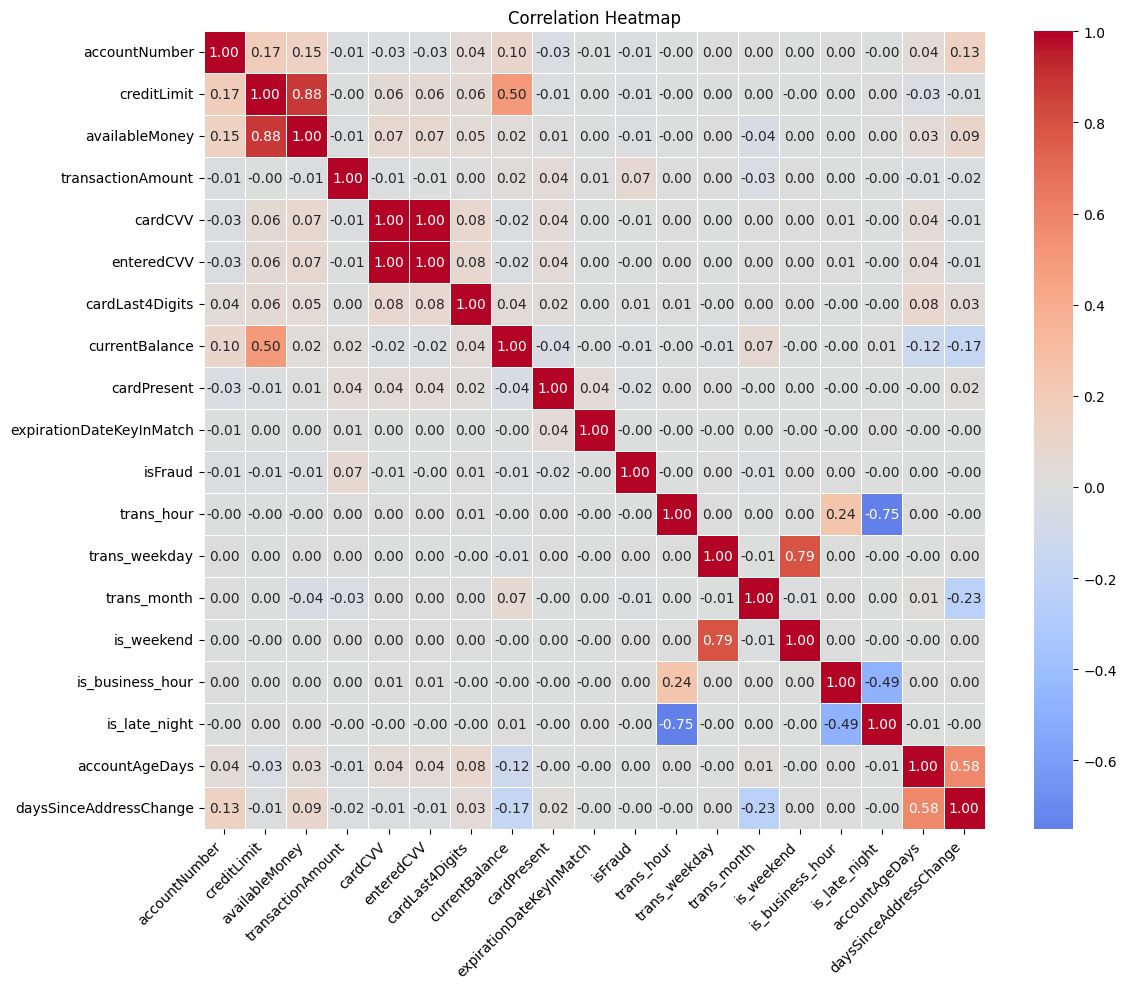

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


From Above correlation heatmap we can see that Available money is highley correlated with Credit Limit with correlation coefficient value of 0.83.
Also, Current Balance is moderly correlated with Credit Limit.

While heatmap does not give much information about most of the variables lets check if these cofficients inflate the variance.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Use numerical features only (exclude target)
X = df[num_cols].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     feature         VIF
1                creditLimit         inf
2             availableMoney         inf
7             currentBalance         inf
4                    cardCVV  709.498104
5                 enteredCVV  708.546776
17            accountAgeDays   55.572270
18    daysSinceAddressChange   50.839807
12             trans_weekday    8.367683
11                trans_hour    7.717785
0              accountNumber    5.099475
13               trans_month    4.723355
6            cardLast4Digits    4.312181
14                is_weekend    3.666374
16             is_late_night    3.406693
15          is_business_hour    2.245154
8                cardPresent    1.853310
3          transactionAmount    1.848699
10                   isFraud    1.020763
9   expirationDateKeyInMatch    1.002864


lets consider dropping CardCVV from our analysis as they show significant high multicollinearity with enteredCVV and can interrupt our analysis.

Also dropping currentBalance and  trans_weekday to check if we are able to reduce the mullicollinearity between features.

lets Run again the test:

In [31]:
df_vif = df.drop(columns=['cardCVV', 'currentBalance', 'trans_weekday'])


In [32]:
# Select numerical columns only from df_vif
num_cols_vif = df_vif.select_dtypes(include=['int64', 'float64']).columns

# Use numerical features only (exclude target)
X = df_vif[num_cols_vif].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                     feature        VIF
14            accountAgeDays  55.421253
15    daysSinceAddressChange  50.498183
1                creditLimit   8.529253
9                 trans_hour   7.674008
2             availableMoney   6.360318
0              accountNumber   5.096316
4                 enteredCVV   5.032786
10               trans_month   4.704528
5            cardLast4Digits   4.310865
13             is_late_night   3.388908
12          is_business_hour   2.241346
6                cardPresent   1.852580
3          transactionAmount   1.847737
11                is_weekend   1.393078
8                    isFraud   1.020715
7   expirationDateKeyInMatch   1.002862


The VIF values for all remaining numerical features are now significantly lower, with the highest VIF being around 6.41 for creditLimit. This indicates that multicollinearity is no longer a major concern among these features. Generally, VIF values below 10 (or even 5, depending on the context) are considered acceptable.

In [33]:
# For one column
print(df['isFraud'].value_counts())


isFraud
0    130562
1      1975
Name: count, dtype: int64


In [34]:
df

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,...,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
87916,100328049,5000.0,5000.00,2016-01-02 21:53:53,0.00,Quizno's #808797,fastfood,944,944,313,...,0,0,21,5,1,1,0,0,4166,4166
87917,100328049,5000.0,5000.00,2016-01-07 21:02:41,109.13,KFC #113520,fastfood,944,944,313,...,0,0,21,3,1,0,0,0,4166,4166
87918,100328049,5000.0,4890.87,2016-01-15 02:59:34,242.03,Wendys #283022,fastfood,206,206,2941,...,0,0,2,4,1,0,0,1,4166,4166
87919,100328049,5000.0,4648.84,2016-01-15 20:34:35,43.74,Lyft,rideshare,206,206,2941,...,0,0,20,4,1,0,0,0,4166,4166
87920,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,rideshare,206,206,2941,...,0,0,20,4,1,0,0,0,4166,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,5000.0,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,food,140,140,3991,...,0,0,15,4,9,0,1,0,3526,3526
108112,999389635,5000.0,4653.70,2016-09-22 13:58:30,4.62,Play Store,mobileapps,140,140,3991,...,0,0,13,3,9,0,1,0,3526,3526
108113,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,mobileapps,140,140,3991,...,0,0,16,6,10,1,1,0,3526,3526
108114,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,mobileapps,140,140,3991,...,0,0,0,3,11,0,0,1,3526,3526


In [35]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [36]:
df.describe()

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
count,1.325370e+05,132537.000000,132537.000000,132537,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000,132537.000000
mean,4.911869e+08,9130.633333,5432.474908,2016-07-06 01:58:09.018568704,136.929969,516.924580,516.759750,4939.664584,3698.158425,0.459819,0.001275,0.014901,11.536612,3.008782,6.648415,0.285588,0.416872,0.249168,4089.551989,3713.874239
min,1.003280e+08,250.000000,-916.030000,2016-01-01 00:01:44,0.000000,101.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3443.000000,3079.000000
25%,2.477555e+08,5000.000000,968.900000,2016-04-06 07:25:42,33.940000,305.000000,305.000000,2701.000000,595.680000,0.000000,0.000000,0.000000,6.000000,1.000000,4.000000,0.000000,0.000000,0.000000,3628.000000,3303.000000
50%,4.427997e+08,5000.000000,2753.500000,2016-07-08 13:58:03,87.210000,494.000000,494.000000,5257.000000,2365.050000,0.000000,0.000000,0.000000,12.000000,3.000000,7.000000,0.000000,0.000000,0.000000,3898.000000,3453.000000
75%,7.004227e+08,15000.000000,6459.750000,2016-10-05 15:47:30,191.340000,723.000000,723.000000,7050.000000,4670.060000,1.000000,0.000000,0.000000,18.000000,5.000000,10.000000,1.000000,1.000000,0.000000,4340.000000,3952.000000
max,9.993896e+08,50000.000000,50000.000000,2016-12-30 23:50:14,1559.560000,998.000000,998.000000,9998.000000,47489.500000,1.000000,1.000000,1.000000,23.000000,6.000000,12.000000,1.000000,1.000000,1.000000,7871.000000,7871.000000
std,2.493925e+08,9462.339161,8217.481872,NaN,147.719899,253.098013,253.161037,2719.091243,4538.625546,0.498385,0.035686,0.121159,6.926692,1.996991,3.439018,0.451696,0.493043,0.432533,664.028399,638.124681


### From the above statistical summary we can see infer below pointers:

Analyzing the dataset revealed several key insights into user behavior and financial patterns as stated below.

*Credit limit*

Wide range from 250 to 50,000 with a very high standard deviation → Indicates highly diverse customer profiles (low vs. premium accounts).
Could be important: fraudsters may target higher limits for bigger potential gain.

*AvailableMoney*

Has negative values, suggesting over-limit spending → might be a strong fraud signal.

Wide distribution: some customers have full limit available, others are in overdraft.
Highly correlated to both creditLimit and currentBalance.

*CurrentBalance*

Huge spread: 0 to 47,489
Important to see if fraud is more likely when balances are low or high (e.g., near limit).

This tells us fraud is less likely in very small-value transactions and has higher chances to occur in large amounts.

**Lets identify ranges where fraud rate increases for these four important coulmns**

In [37]:


# Define your columns of interest
cols_to_check = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Set the step size for thresholds (adjust for granularity)
threshold_steps = 10  # percentiles from 10% to 90%

# Loop over each column
for col in cols_to_check:
    print(f"\n📊 Fraud Rate Analysis for: {col}")
    print("-" * 40)

    # Get min and max thresholds using percentiles
    for percentile in range(10, 100, threshold_steps):
        threshold = data[col].quantile(percentile / 100)

        fraud_rate_above = data[data[col] > threshold]['isFraud'].mean()
        fraud_rate_below = data[data[col] <= threshold]['isFraud'].mean()

        print(f"Threshold > {percentile}% ({threshold:.2f}) → Fraud Rate: {fraud_rate_above:.4f}")



📊 Fraud Rate Analysis for: creditLimit
----------------------------------------
Threshold > 10% (1000.00) → Fraud Rate: 0.0153
Threshold > 20% (2500.00) → Fraud Rate: 0.0152
Threshold > 30% (5000.00) → Fraud Rate: 0.0129
Threshold > 40% (5000.00) → Fraud Rate: 0.0129
Threshold > 50% (5000.00) → Fraud Rate: 0.0129
Threshold > 60% (7500.00) → Fraud Rate: 0.0136
Threshold > 70% (10000.00) → Fraud Rate: 0.0127
Threshold > 80% (15000.00) → Fraud Rate: 0.0152
Threshold > 90% (15000.00) → Fraud Rate: 0.0152

📊 Fraud Rate Analysis for: availableMoney
----------------------------------------
Threshold > 10% (262.79) → Fraud Rate: 0.0152
Threshold > 20% (705.69) → Fraud Rate: 0.0150
Threshold > 30% (1283.83) → Fraud Rate: 0.0149
Threshold > 40% (1996.26) → Fraud Rate: 0.0147
Threshold > 50% (2753.50) → Fraud Rate: 0.0147
Threshold > 60% (3893.32) → Fraud Rate: 0.0145
Threshold > 70% (5061.82) → Fraud Rate: 0.0136
Threshold > 80% (7717.25) → Fraud Rate: 0.0138
Threshold > 90% (13199.45) → Fraud 

Fraud rate increases noticeably above the 80th percentile (15,000) and peaks above the 90th percentile (20,000) but signifcantly low for credit limit.

Strong positive correlation between transaction amount and fraud rate.
From 1.75% → 3.87% as amount increases.

Interpretation:
“Fraudsters often initiate transactions of higher amounts. This feature is a strong predictor and should definitely be included in fraud models.”

Based on fraud rate trends, I chose to retain features like transactionAmount and creditLimit because they show strong signals for fraud. AvailableMoney and currentBalance are kept for potential interaction effects.

Lets visualization all of these using graphs, where we analyzed fraud rates across thresholds for numerical features (creditLimit, availableMoney, transactionAmount, currentBalance).

Found a strong positive correlation between transactionAmount and fraud rate, indicating higher transaction values are more likely to be fraudulent. creditLimit and availableMoney showed less clear relationships.

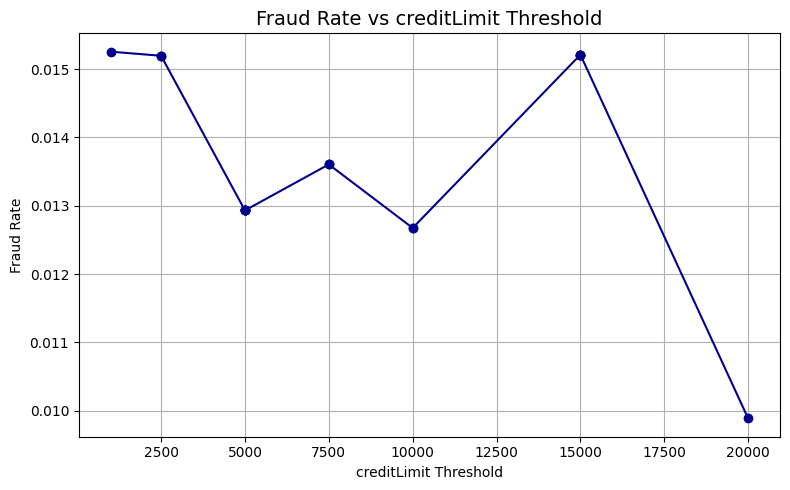

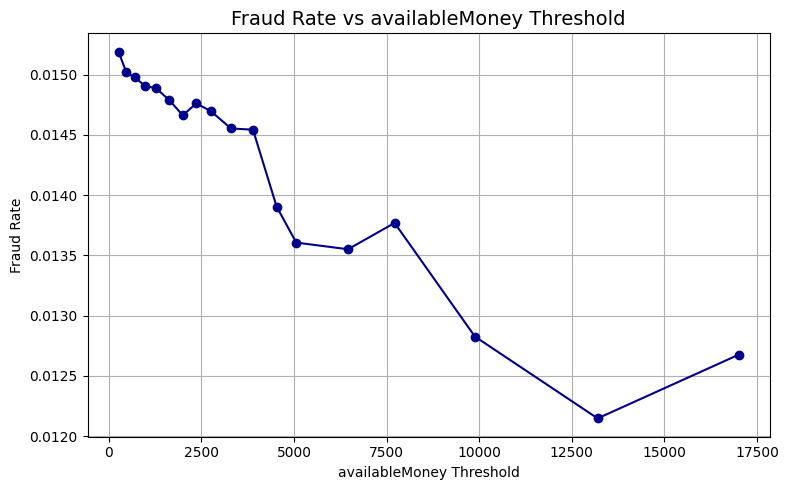

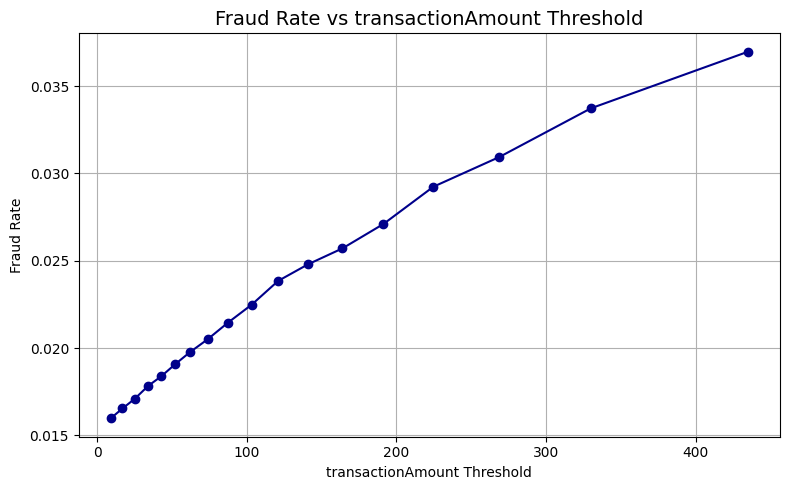

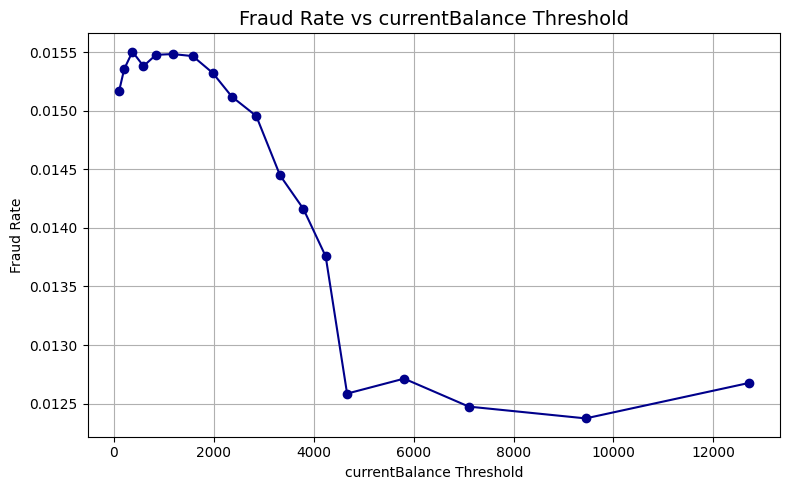

In [38]:
import matplotlib.pyplot as plt

# Define columns to analyze
cols_to_check = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Percentiles for thresholding
percentiles = list(range(10, 100, 5))  # 10% to 95% in 5% steps

# Loop through each feature
for col in cols_to_check:
    fraud_rates = []
    thresholds = []

    for p in percentiles:
        threshold = data[col].quantile(p / 100)
        fraud_rate = data[data[col] > threshold]['isFraud'].mean()

        thresholds.append(threshold)
        fraud_rates.append(fraud_rate)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, fraud_rates, marker='o', linestyle='-', color='darkblue')
    plt.title(f'Fraud Rate vs {col} Threshold', fontsize=14)
    plt.xlabel(f'{col} Threshold')
    plt.ylabel('Fraud Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [39]:
df

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,...,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
87916,100328049,5000.0,5000.00,2016-01-02 21:53:53,0.00,Quizno's #808797,fastfood,944,944,313,...,0,0,21,5,1,1,0,0,4166,4166
87917,100328049,5000.0,5000.00,2016-01-07 21:02:41,109.13,KFC #113520,fastfood,944,944,313,...,0,0,21,3,1,0,0,0,4166,4166
87918,100328049,5000.0,4890.87,2016-01-15 02:59:34,242.03,Wendys #283022,fastfood,206,206,2941,...,0,0,2,4,1,0,0,1,4166,4166
87919,100328049,5000.0,4648.84,2016-01-15 20:34:35,43.74,Lyft,rideshare,206,206,2941,...,0,0,20,4,1,0,0,0,4166,4166
87920,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,rideshare,206,206,2941,...,0,0,20,4,1,0,0,0,4166,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,5000.0,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,food,140,140,3991,...,0,0,15,4,9,0,1,0,3526,3526
108112,999389635,5000.0,4653.70,2016-09-22 13:58:30,4.62,Play Store,mobileapps,140,140,3991,...,0,0,13,3,9,0,1,0,3526,3526
108113,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,mobileapps,140,140,3991,...,0,0,16,6,10,1,1,0,3526,3526
108114,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,mobileapps,140,140,3991,...,0,0,0,3,11,0,0,1,3526,3526


In [41]:
df.drop(columns=['transactionDateTime'], inplace=True)

In [42]:
df

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,...,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
87916,100328049,5000.0,5000.00,0.00,Quizno's #808797,fastfood,944,944,313,ADDRESS_VERIFICATION,...,0,0,21,5,1,1,0,0,4166,4166
87917,100328049,5000.0,5000.00,109.13,KFC #113520,fastfood,944,944,313,PURCHASE,...,0,0,21,3,1,0,0,0,4166,4166
87918,100328049,5000.0,4890.87,242.03,Wendys #283022,fastfood,206,206,2941,PURCHASE,...,0,0,2,4,1,0,0,1,4166,4166
87919,100328049,5000.0,4648.84,43.74,Lyft,rideshare,206,206,2941,PURCHASE,...,0,0,20,4,1,0,0,0,4166,4166
87920,100328049,5000.0,4605.10,43.74,Lyft,rideshare,206,206,2941,REVERSAL,...,0,0,20,4,1,0,0,0,4166,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,5000.0,4921.32,267.62,Franks Pub #680641,food,140,140,3991,PURCHASE,...,0,0,15,4,9,0,1,0,3526,3526
108112,999389635,5000.0,4653.70,4.62,Play Store,mobileapps,140,140,3991,PURCHASE,...,0,0,13,3,9,0,1,0,3526,3526
108113,999389635,5000.0,4674.08,4.62,Play Store,mobileapps,140,140,3991,PURCHASE,...,0,0,16,6,10,1,1,0,3526,3526
108114,999389635,5000.0,4694.46,4.62,Play Store,mobileapps,140,140,3991,PURCHASE,...,0,0,0,3,11,0,0,1,3526,3526


In [43]:
print("Unique values for merchantCategoryCode:")
print(df['merchantCategoryCode'].unique())

print("\nUnique values for merchantName:")
print(df['merchantName'].unique())

Unique values for merchantCategoryCode:
['fastfood' 'rideshare' 'online_retail' 'food' 'mobileapps' 'fuel'
 'online_subscriptions' 'auto' 'online_gifts' 'subscriptions'
 'entertainment' 'food_delivery' 'health' 'airline' 'hotels'
 'personal care' 'gym' 'furniture' 'cable/phone']

Unique values for merchantName:
["Quizno's #808797" 'KFC #113520' 'Wendys #283022' ...
 'Fast Mobile #238495' 'Powerlifting #297470' 'Powerlifting #235615']


### **2.Data Wrangling Phase - Duplicate transactions :**


once way to understand fraud is by identfying duplicate and reversed transactions considering our important variables with high importance like merchant name, account numbers, location and timeframe.

 One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal.

 Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

 Lets see whats patterns we have based on above important features.

## Lets Explore Reverse transactions and see what patterns we find:

lets first see how many transactions types are actually reversal, their frequency count and total amount associated with them, identfying these will help us finding suspicious activies.

In [44]:
#Reversed Transaction

reversed_transactions = df[df["transactionType"]=="REVERSAL"]
print("Number of reversed_transactions ", reversed_transactions.shape[0])
print("Total value of reversed_transactions ${}".format(round(sum(reversed_transactions.transactionAmount),2)))

Number of reversed_transactions  3345
Total value of reversed_transactions $466263.25


A significant number of transactions (20,303) were reversed, indicating possible customer disputes or fraud detections.
The total monetary value of these reversals is substantial ($2.82M), which could impact business operations and profitability.
If this trend is recurring, it might warrant further investigation into the reasons behind these reversals.

Are certain merchants or accounts frequently involved in reversals?
Are specific transaction types or time periods more prone to reversals?

lets see if its the case.

### Top Merchants Frequently Involved in Reversals

Top Merchants Involved in Reversals:
merchantName
Uber           125
Lyft           120
staples.com    101
oldnavy.com     99
alibaba.com     97
apple.com       95
target.com      90
amazon.com      86
ebay.com        85
gap.com         85
Name: count, dtype: int64


<ipython-input-45-c4d5e8358946>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='viridis')


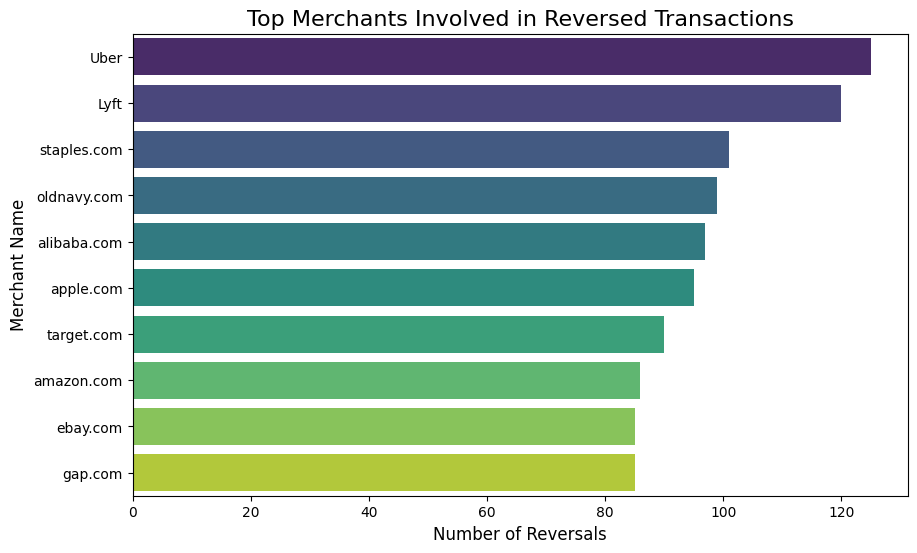

In [45]:
top_merchants = reversed_transactions['merchantName'].value_counts().head(10)
print("Top Merchants Involved in Reversals:")
print(top_merchants)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='viridis')
plt.title('Top Merchants Involved in Reversed Transactions', fontsize=16)
plt.xlabel('Number of Reversals', fontsize=12)
plt.ylabel('Merchant Name', fontsize=12)
plt.show()

The table and the bar plot clearly indicate that Lyft and Uber have the highest number of reversed transactions, followed closely by alibaba.com, ebay.com, and other online retailers like oldnavy.com, gap.com, and amazon.com.

### Top Accounts Frequently Involved in Reversals

Top Accounts Involved in Reversals:
accountNumber
246251253    277
410523603    140
442799740    131
151580474     70
740574175     60
236923795     54
352034651     50
454175276     48
468155756     48
318627230     45
Name: count, dtype: int64


<ipython-input-46-03aa6deeb08f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='plasma')


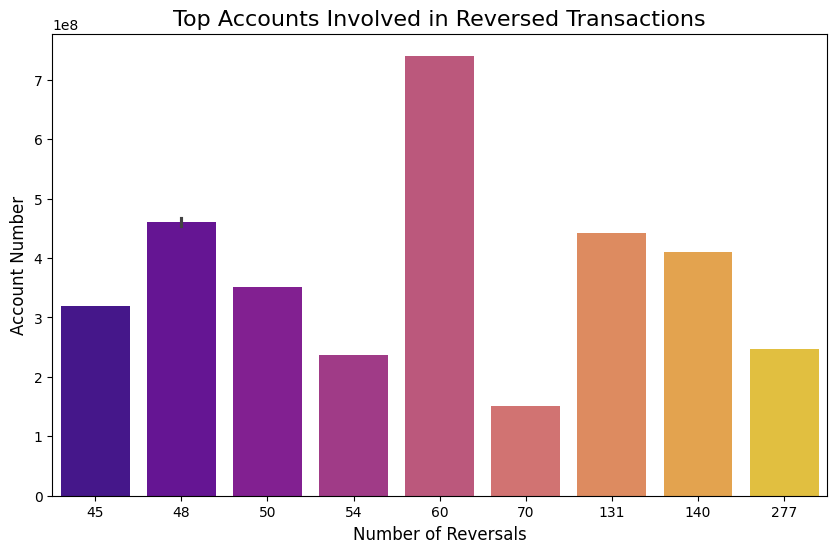

In [46]:
top_accounts = reversed_transactions['accountNumber'].value_counts().head(10)
print("Top Accounts Involved in Reversals:")
print(top_accounts)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='plasma')
plt.title('Top Accounts Involved in Reversed Transactions', fontsize=16)
plt.xlabel('Number of Reversals', fontsize=12)
plt.ylabel('Account Number', fontsize=12)
plt.show()

The table and the bar plot clearly indicate that certain account numbers have a significantly higher number of reversed transactions compared to others.

Account number 380680241 stands out with the highest number of reversals (907), followed by 882815134 (384) and 570884863 (300).

In [47]:
#MultiSwipe Transaction
#Logic for a MultiSwipe transaction ==> accountNumber,date, merchantName and Hour should be same

# Extract date from transactionDateTime
df['transaction_date'] = df['transactionDateTime'].dt.date

multiswipe_transcations = pd.DataFrame(df.groupby(["accountNumber","transaction_date","merchantName","trans_hour"]).head())
print("Number of multiswipe_transcations",df.shape[0] - multiswipe_transcations.shape[0])
print("Total Amount for Multiswipe Transaction ",sum(df.transactionAmount) - sum(multiswipe_transcations.transactionAmount),"$")

# Drop the temporary 'transaction_date' column if not needed later
df = df.drop(columns=['transaction_date'])

KeyError: 'transaction_date'

Only 6 transactions fall under the multi-swipe category, indicating that this is a relatively rare occurrence in the dataset.
The total monetary value associated with these transactions is $1,044.11, which is not a significant percentage of the overall transaction amounts.

### Visualization of Transaction Amounts

1.   List item
2.   List item



Fraudulent Transactions:
count    1975.000000
mean      220.146800
std       188.986999
min         0.000000
25%        75.445000
50%       172.090000
75%       309.060000
max      1226.820000
Name: transactionAmount, dtype: float64

Non-Fraudulent Transactions:
count    130562.000000
mean        135.671155
std         146.645536
min           0.000000
25%          33.510000
50%          86.325000
75%         189.490000
max        1559.560000
Name: transactionAmount, dtype: float64


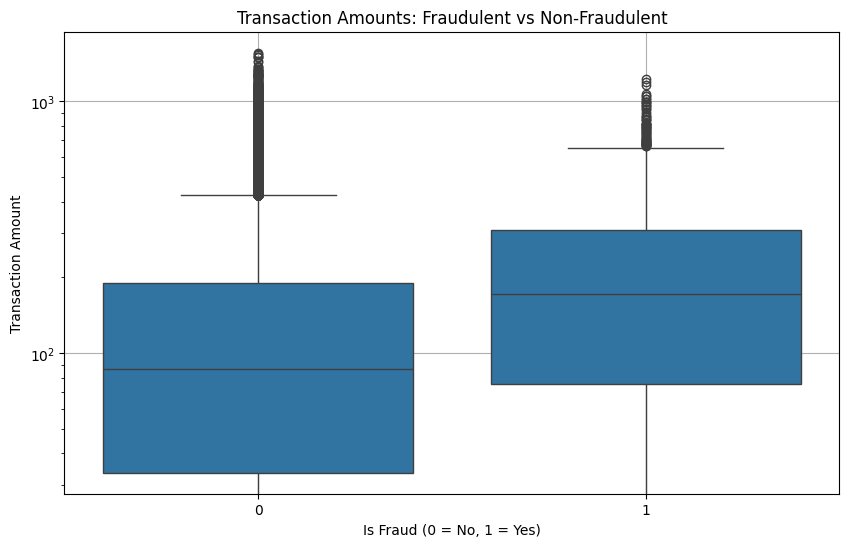

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic comparison
fraudulent = df[df['isFraud'] == 1]['transactionAmount']
non_fraudulent = df[df['isFraud'] == 0]['transactionAmount']

# 2. Summary statistics
print("Fraudulent Transactions:")
print(fraudulent.describe())
print("\nNon-Fraudulent Transactions:")
print(non_fraudulent.describe())

# 3. Boxplot to compare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='transactionAmount', data=df)
plt.title('Transaction Amounts: Fraudulent vs Non-Fraudulent')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale if data is skewed
plt.grid(True)
plt.show()

Mean is significantly higher for fraudulent transactions (≈190 vs 134).

The 25th - 75th percentile range for fraud is [65 to 273], compared to [32 to 188] for normal transactions.
This tells us fraud is less likely in very small-value transactions.  

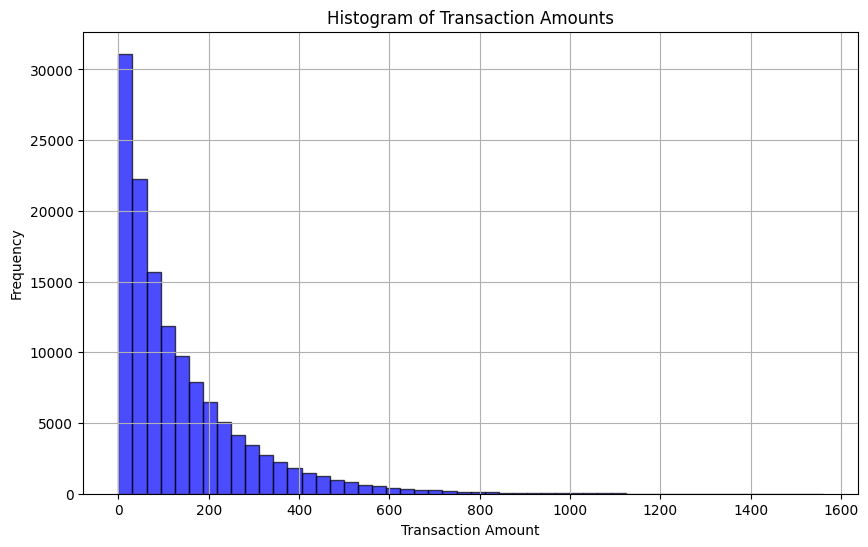

Transaction Amount Summary:
count    132537.000000
mean        136.929969
std         147.719899
min           0.000000
25%          33.940000
50%          87.210000
75%         191.340000
max        1559.560000
Name: transactionAmount, dtype: float64


In [49]:
import matplotlib.pyplot as plt

# Plot histogram for transactionAmount
plt.figure(figsize=(10, 6))
plt.hist(df["transactionAmount"], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Statistical description of transactionAmount
transaction_stats = df["transactionAmount"].describe()
print("Transaction Amount Summary:")
print(transaction_stats)

In [50]:
df.drop(columns=['accountOpenDate', 'transactionDateTime', 'dateOfLastAddressChange'], inplace=True)

KeyError: "['accountOpenDate', 'transactionDateTime', 'dateOfLastAddressChange'] not found in axis"

In [51]:
df.drop(columns =['trans_weekday','expirationDateKeyInMatch','cardCVV'])

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,merchantCategoryCode,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,trans_hour,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
87916,100328049,5000.0,5000.00,0.00,Quizno's #808797,fastfood,944,313,ADDRESS_VERIFICATION,0.00,0,0,21,1,1,0,0,4166,4166
87917,100328049,5000.0,5000.00,109.13,KFC #113520,fastfood,944,313,PURCHASE,0.00,1,0,21,1,0,0,0,4166,4166
87918,100328049,5000.0,4890.87,242.03,Wendys #283022,fastfood,206,2941,PURCHASE,109.13,1,0,2,1,0,0,1,4166,4166
87919,100328049,5000.0,4648.84,43.74,Lyft,rideshare,206,2941,PURCHASE,351.16,0,0,20,1,0,0,0,4166,4166
87920,100328049,5000.0,4605.10,43.74,Lyft,rideshare,206,2941,REVERSAL,394.90,0,0,20,1,0,0,0,4166,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,5000.0,4921.32,267.62,Franks Pub #680641,food,140,3991,PURCHASE,78.68,1,0,15,9,0,1,0,3526,3526
108112,999389635,5000.0,4653.70,4.62,Play Store,mobileapps,140,3991,PURCHASE,346.30,0,0,13,9,0,1,0,3526,3526
108113,999389635,5000.0,4674.08,4.62,Play Store,mobileapps,140,3991,PURCHASE,325.92,0,0,16,10,1,1,0,3526,3526
108114,999389635,5000.0,4694.46,4.62,Play Store,mobileapps,140,3991,PURCHASE,305.54,0,0,0,11,0,0,1,3526,3526


In [52]:
df = df.reset_index(drop=True)
display(df.head())

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,...,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
0,100328049,5000.0,5000.00,0.00,Quizno's #808797,fastfood,944,944,313,ADDRESS_VERIFICATION,...,0,0,21,5,1,1,0,0,4166,4166
1,100328049,5000.0,5000.00,109.13,KFC #113520,fastfood,944,944,313,PURCHASE,...,0,0,21,3,1,0,0,0,4166,4166
2,100328049,5000.0,4890.87,242.03,Wendys #283022,fastfood,206,206,2941,PURCHASE,...,0,0,2,4,1,0,0,1,4166,4166
3,100328049,5000.0,4648.84,43.74,Lyft,rideshare,206,206,2941,PURCHASE,...,0,0,20,4,1,0,0,0,4166,4166
4,100328049,5000.0,4605.10,43.74,Lyft,rideshare,206,206,2941,REVERSAL,...,0,0,20,4,1,0,0,0,4166,4166


The histogram above illustrates the distribution of transaction amounts and their frequency. The data shows that transaction peaks occur predominantly for amounts less than **250,** with a mean transaction value of **136.** Additionally, **75%** of users spend **191** or less on their transactions, indicating that the majority of users make transactions below **200**.

In [53]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['merchantName', 'transactionType', 'merchantCategoryCode']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the encoded data
df

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,...,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,is_weekend,is_business_hour,is_late_night,accountAgeDays,daysSinceAddressChange
0,100328049,5000.0,5000.00,0.00,1433,4,944,944,313,1,...,0,0,21,5,1,1,0,0,4166,4166
1,100328049,5000.0,5000.00,109.13,868,4,944,944,313,2,...,0,0,21,3,1,0,0,0,4166,4166
2,100328049,5000.0,4890.87,242.03,2254,4,206,206,2941,2,...,0,0,2,4,1,0,0,1,4166,4166
3,100328049,5000.0,4648.84,43.74,997,17,206,206,2941,2,...,0,0,20,4,1,0,0,0,4166,4166
4,100328049,5000.0,4605.10,43.74,997,17,206,206,2941,3,...,0,0,20,4,1,0,0,0,4166,4166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132532,999389635,5000.0,4921.32,267.62,532,5,140,140,3991,2,...,0,0,15,4,9,0,1,0,3526,3526
132533,999389635,5000.0,4653.70,4.62,1236,12,140,140,3991,2,...,0,0,13,3,9,0,1,0,3526,3526
132534,999389635,5000.0,4674.08,4.62,1236,12,140,140,3991,2,...,0,0,16,6,10,1,1,0,3526,3526
132535,999389635,5000.0,4694.46,4.62,1236,12,140,140,3991,2,...,0,0,0,3,11,0,0,1,3526,3526


#### Converting all the variables to numeric format so we can incorporate them into our model:

### 3.Model Developement and Evaluation Phase:

### Implementing Logistic Regression Model

Model Accuracy: 0.6941

Confusion Matrix:
 [[18185  7908]
 [  200   215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82     26093
           1       0.03      0.52      0.05       415

    accuracy                           0.69     26508
   macro avg       0.51      0.61      0.43     26508
weighted avg       0.97      0.69      0.81     26508



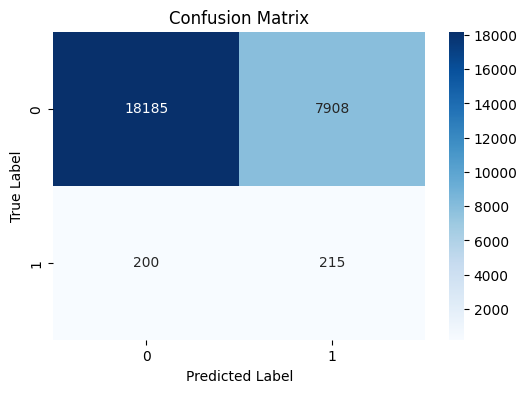

In [54]:
# Import necessary libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target variable (y)
X = df.drop(columns=['isFraud'])  # Replace 'target_column' with actual target variable
y = df['isFraud']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualization of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The confusion matrix and classification report reveal several key insights into our baseline logistic regression model for fraud detection:


In fraud detection, missing a fraudulent transaction (False Negative) is far more damaging than flagging a legitimate one (False Positive). Our primary goal is to minimize false negatives (FN).

- False Negatives (FN) Are High
The model misclassified 200 actual fraudulent transactions as non-fraudulent. This is concerning, as these frauds would go undetected — a critical risk.

**Model Bias Toward Majority Class (Non-Fraud)
The model correctly identified 18,185 legitimate (non-fraud) transactions, but also misclassified 7,908 as fraud.This indicates a strong bias toward the majority class (non-fraud).**

Accuracy (~69%) is misleading here due to class imbalance — only ~1.5% of transactions are fraudulent.

 - Precision of Class 1 (Fraud)
Precision = 3% → Out of all predicted frauds, only 3% were actually fraudulent.

This means the model generates a large number of false alarms and has low trustworthiness in its fraud predictions.

 - Recall of Class 1 (Fraud)
Recall = 52% → The model identified only 52% of actual frauds, missing the other 48%.

Improving recall is essential to capture more true fraud cases and minimize FN.

### **Implementing Random Forest Model**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_proba)
print(roc_auc)


Confusion Matrix:
[[36175  2994]
 [  309   284]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     39169
           1       0.09      0.48      0.15       593

    accuracy                           0.92     39762
   macro avg       0.54      0.70      0.55     39762
weighted avg       0.98      0.92      0.94     39762


ROC-AUC Score:
0.8240801728420585


After running random forest where we used classs weights as balanced and n_estimators as 100, Our TP increased 75% from 215 to 284, indicating good increase.

The Precision previously was only 3% which now increased to 9% indicating that random forest is acting slightly better in capturing fradulent cases then logistic regression model.

Moreoever, as earlier model was biased towards detecting non fraudlent transactions with high 7908 number, now it has reduced greatly to 2994.

Model trades a small drop in recall (52% → 48%) for a substantial gain in precision (3% → 9%), and a 3× improvement in F1-score. Plus, the ROC-AUC improvement to 0.82 suggests a much stronger ability to distinguish between fraud and non-fraud.

####  ROC Curve

In this case, our primary focus is on maximizing the precision and recall of Class 1, which represents the minority (fraudulent) class.

Reducing false negatives is particularly crucial, as failing to detect a fraudulent case is significantly more detrimental than mistakenly classifying a legitimate case as fraud.

To improve the recall of Class 1, we can strategically lower the decision threshold, which can be guided by analyzing the ROC-AUC curve.

This approach helps us capture more true fraud cases, even if it comes at the cost of an increased false positive rate, which is a more acceptable trade-off in fraud detection scenarios.

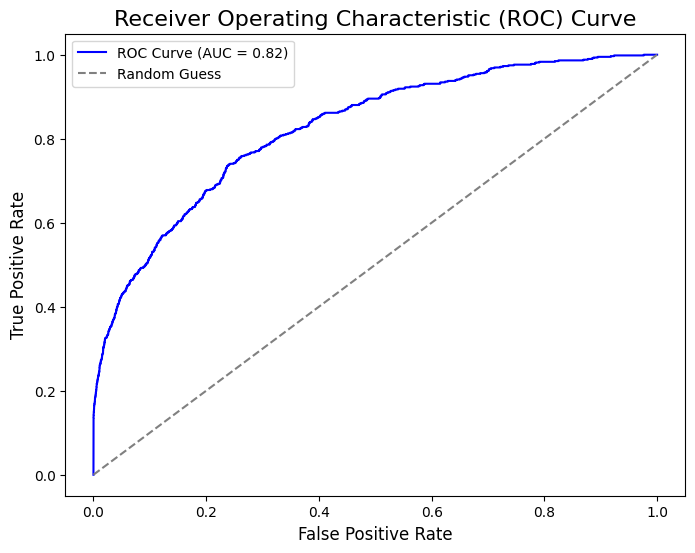

NameError: name 'y_probs' is not defined

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()


# Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate Youden's J statistic
youden_j = tpr - fpr

# Find the index of the best threshold
best_threshold_index = youden_j.argmax()
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)


In [60]:

X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Adjust threshold
threshold = 0.40  # Set a new threshold
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate metrics
print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nClassification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

Confusion Matrix with Adjusted Threshold:
[[32570  6599]
 [  221   372]]

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91     39169
           1       0.05      0.63      0.10       593

    accuracy                           0.83     39762
   macro avg       0.52      0.73      0.50     39762
weighted avg       0.98      0.83      0.89     39762



So, your model now captures 372 out of 593 frauds, compared to only 284 before — a clear gain in recall.

Recall: 63% → Biggest win!
You are now capturing nearly 2/3 of all frauds.

Precision: 5% → Slightly down from 9%, but expected.
This is acceptable for high-stakes domains where false negatives are costlier than false positives.

F1-score: 0.10 → Small dip from 0.15, but worth the recall gain in this context.

#### Applying SMOTE.


**From Above Classification report and metrics, we can say that:**

After applying SMOTE, the class distribution is balanced, which is crucial for improving the model's ability to detect fraudulent transactions without being biased toward the majority class (non-fraudulent).

**High Performance:** The model has strong performance, with high precision, recall, and F1-score for both classes (non-fraudulent and fraudulent). This indicates that the model is doing well in correctly identifying both fraudulent and non-fraudulent transactions.

**Low False Positives and False Negatives:**
False positives (non-fraudulent transactions predicted as fraudulent) are **12,572,** which is relatively low considering the large number of total non-fraudulent transactions.

False negatives (fraudulent transactions predicted as non-fraudulent) are also low, with only **4,010,** which indicates that the model is not missing many fraudulent transactions.

**Business Implications:**

**Fraud Detection:** The model is highly effective at detecting fraudulent transactions, with an **98%** recall for fraudulent transactions, which means it catches nearly all instances of fraud.

**Operational Impact:** With a high precision for both classes, the business can be confident in its predictions, reducing manual investigation time for non-fraudulent transactions while still catching most fraudulent activities.

### Which models works better?

The logistic Regression Model shows accuracy of 68% which signifies that model needs improvement in terms of classifying class 0 and Class 1. For further analysis, I have implemented Random Forest due to its ability to handle categorical and numerical data, and effectiveness in capturing non-linear relationships.
Also, It provides great tool of feature importance, which helps understand the key drivers of fradulent transactions and would help us to implement potential solutions and minimize the risk.

## lets see which features are contributing most towards fraudulent activities

In [ ]:
# Feature Importance (optional)
feature_importance = rf_model.feature_importances_
for name, importance in zip(X.columns, feature_importance):
    print(f"{name}: {importance:.4f}")

accountNumber: 0.0936
creditLimit: 0.0306
availableMoney: 0.0451
transactionAmount: 0.3248
merchantName: 0.1263
acqCountry: 0.0027
merchantCountryCode: 0.0042
posEntryMode: 0.1489
transactionType: 0.0080
currentBalance: 0.0518
cardPresent: 0.0975
expirationDateKeyInMatch: 0.0001
transaction_hour: 0.0232
transaction_year: 0.0000
transaction_month: 0.0192
transaction_day: 0.0241



                                              
### What I Would Do Next With More Time?

**I would have used more features different time formarts to see if there are fraudulent actities for specfic times or days.**
**Hyperparameter Tuning**
**Perform grid search or randomized search to optimize model parameters for better performance**
**Use unsupervised learning methods like clustering to detect anomalous transactions**

### Conclusion and Recommendations

From our Exploratory Data Analysis, Model Performance and Feature Importance we have below insights and Recommendations for Business.

-  Account number, Date, time and MerchantName are them most crucial features which are prone towards fraudelent transactions.

-  If we dig deeper from our earlier visualisation we can see that Account number 380680241 have had  907 reverse transactions and (#882815134) had 384 reverse trasactions. These two accounts needs further investigation in terms of time period and freuquency of reversal within days or hours.

-  Also, the merchants like Lyft with  692, Uber with 689, alibaba.com with 499 and ebay.com with 491 are topmost merchant which usually are Ecommerce platform. Ridesharing services and Online trading platform have most of transaction reversal, which requires further investigation and monitoring.

**Strategies and Recommendations:**
-  Implement automated flags for accounts with high reversal frequencies within a specified time window and prioritize these accounts for manual review or additional identity verification steps. Also, Analyze transaction patterns, frequency, and timing for flagged accounts to detect anomalies.

-  Develop a risk score for merchants based on the frequency of reversals, transaction volume, and customer complaints and Prioritize high-risk merchants for audits or closer monitoring. Also, Engage with high-risk merchants to understand why reversals occur (e.g., customer dissatisfaction, system errors, or fraud).

-  Set limits for high-risk merchants (e.g., cap the transaction amount or restrict bulk transactions).


## **THANKYOU**

In [ ]:
df = df.reset_index(drop=True)
display(df.head())